In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
dfx=pd.read_csv('/jupyter/Linear_X_Train.csv')
dfy=pd.read_csv('/jupyter/Linear_Y_Train.csv')
df_test=pd.read_csv('/jupyter/Linear_X_Test.csv')
x=dfx.values
y=dfy.values
df_test=df_test.values
x=x.reshape((-1,))
y=y.reshape((-1,))
test_data_array=df_test.reshape((-1,))


In [33]:
print(x.shape)
print(y.shape)
print(test_data_array.shape)


(3750,)
(3750,)
(1250,)


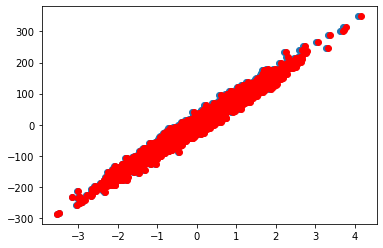

In [34]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y,color='red')
plt.show()

In [35]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [36]:
def error(X,Y,theta):
    m = X.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
    return error

In [37]:
def gradient(X,Y,theta):
            grad = np.zeros((2,))
            m = X.shape[0]
            for i in range(m):
                hx = hypothesis(X[i],theta)
                grad[0] +=  (hx-Y[i])
                grad[1] += (hx-Y[i])*X[i]
                return grad

In [44]:
def gradientDescent(X,Y,learning_rate=0.00001):
        theta = np.array([-300.0,0.0])
        itr = 0
        max_itr = 300
            
        error_list = []
        theta_list = []
        while(itr<=max_itr):
                grad = gradient(X,Y,theta)
                e = error(X,Y,theta)
                error_list.append(e)
                theta_list.append((theta[0],theta[1]))
                theta[0] = theta[0] - learning_rate*grad[0]
                theta[1] = theta[1] - learning_rate*grad[1]
                itr += 1
                
        return theta,error_list,theta_list

In [45]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

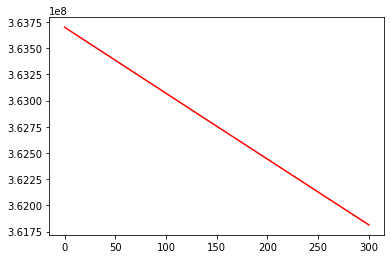

In [46]:
plt.plot(error_list,color='red')
plt.show()

In [54]:
print(final_theta)

[-2.99098714e+02 -2.28494621e-01]


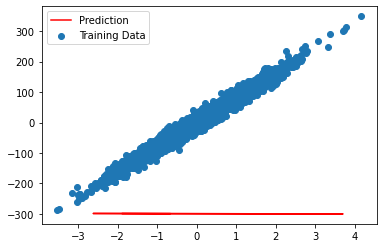

''

In [53]:
plt.scatter(X,Y,label='Training Data')
plt.plot(test_data_array,hypothesis(test_data_array,final_theta),color='red',label="Prediction")
plt.legend()
plt.show()
